# Shapefiles

> Functions for loading and downloading shapefiles

In [ ]:
#| default_exp shapefiles

In [ ]:
#| hide
from nbdev.showdoc import *

point to a default location (Users/Documents/GEOG_FILES) if its empty, create it and download a simple geography file e.g. california

In [ ]:
#| export
#| hide
from pathlib import Path
import requests
import zipfile
import geopandas as gpd

In [ ]:
#| export
SHAPE_FILES_PATH = Path.home() / 'Documents' / 'SHP_FILES'

Do we want to create a registry?

In [ ]:
#| export
def check_shapefiles_path(shp_path=SHAPE_FILES_PATH):
    "Looks for a Path User/Documents/SHP_FILES. Does it contain Shapefiles"
    # does the shape file path exist?
    if not shp_path.exists():
        print(f'Did not find {SHAPE_FILES_PATH.as_posix()}')
        create_shp_drive = True if input('Do you want to create drive y/n?').lower()=='y' else False
        if create_shp_drive:
            SHAPE_FILES_PATH.mkdir(parents=True)
    #are there shape files?
    if len(list(SHAPE_FILES_PATH.glob('**/*.shp')))==0:
        print(f'No shape files were found in {shp_path.as_posix()}')
        download_ca = True if input('Do you want to download california counties shape file y/n?').lower()=='y' else False
        if download_ca:
            california_url = "https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/b0007416-a325-4777-9295-368ea6b710e6/download/"
            filename = "ca_counties.zip"
            download_and_unzip(california_url, filename, shp_path)

def download_and_unzip(url, filename, download_path=SHAPE_FILES_PATH):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    if (download_path/filename.split('.')[0]).exists():
        overwrite = True if input(f"{filename} already exists, do you want to overwrite y/n?").lower() == 'y' else False
        if not overwrite:
            return None
    response = requests.get(url+filename, headers=headers, stream=True)
    file_location = download_path/filename
    if response.status_code == 200:
        with open(file_location, "wb") as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
        print("Download complete.")
    else:
        print(f"Failed with status code {response.status_code}")
        return None

    zf = zipfile.ZipFile(file_location)
    zf.extractall(download_path/filename.split('.')[0])

In [ ]:
#| export
california_url = "https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/b0007416-a325-4777-9295-368ea6b710e6/download/"
filename = "ca_counties.zip"

def load_gdf(foldername=None, #If no argument is entered, function will print out the list of shp files in the shape files directory
             plot=False, 
             shp_path=SHAPE_FILES_PATH):
    "Load shapefiles into gdf"
    check_shapefiles_path()
    if foldername is None:
        print("Available shapefiles are: ", ' '.join([x.parent.name for x in shp_path.glob('**/*.shp')]))
        return None
    shp_file = list((shp_path/foldername).glob('**/*.shp'))
    gdf = gpd.read_file(shp_file[0])
    if plot:
        gdf.plot()
    return gdf

    

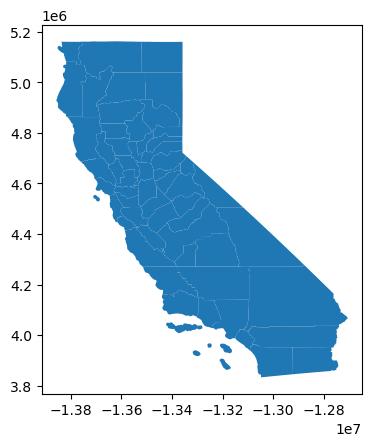

In [ ]:
ca = load_gdf('ca_counties', plot=True)

In [ ]:
load_gdf()

Available shapefiles are:  atlanta_hom atlanta_hom LSOA_2021_BOUNDARIES_V4 ca_state ca_counties ca_places


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()